# Visualizing HSIC Measures

In [178]:
import sys, os
import warnings
import tqdm
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Insert path to model directory,.
cwd = os.getcwd()
path = f"{cwd}/../../src"
sys.path.insert(0, path)

# toy datasets
from data.toy import generate_dependence_data

# Kernel Dependency measure
from models.dependence import HSIC
from models.kernel import estimate_sigma, sigma_to_gamma, gamma_to_sigma, get_param_grid

# RBIG IT measures
from models.ite_algorithms import run_rbig_models

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [372]:
fig_path = "/home/emmanuel/projects/2019_hsic_align/results/figures/distribution_experiment/"

In [394]:
save_path   = f'{cwd}/../../results/hsic/'
save_name   = 'dist_v4_median'

cols = [
    'dataset', 
    'trial', 
    'n_samples', 
    'd_dimensions', 
    'nu', 
    'noise',
    'gamma', 
    'gamma_mean',
    'gamma_silv',
    'gamma_scott',
    'scorer', 
    'value'
]
results_df = pd.read_csv(f"{save_path}{save_name}.csv")[cols]

In [395]:
results_df.tail()

,dataset,trial,n_samples,d_dimensions,nu,noise,gamma,gamma_mean,gamma_silv,gamma_scott,scorer,value
4462,tstudent,5,500,100,3,0.135388,50.000000,1.0,0.913112,0.941994,tka,1.000000
4463,tstudent,5,500,100,3,0.135388,0.549271,1.0,0.913112,0.941994,ctka,1.000000
4464,tstudent,5,500,100,1,0.187795,0.005000,1.0,0.913112,0.941994,hsic,0.022005
4465,tstudent,5,500,100,1,0.187795,50.000000,1.0,0.913112,0.941994,tka,1.000000
4466,tstudent,5,500,100,1,0.187795,1.164976,1.0,0.913112,0.941994,ctka,1.000000


In [396]:
res_samples = results_df['n_samples'].unique().tolist()
res_samples = results_df['noise'].unique().tolist()
res_dimensions = results_df['d_dimensions'].unique().tolist()
res_scorer = results_df['scorer'].unique().tolist()

In [397]:
res_samples = results_df['noise'].unique().tolist()
res_samples

[0.001,
 0.0013870919878509276,
 0.001924024182760239,
 0.002668798528338159,
 0.0037018690558462053,
 0.005134832907437549,
 0.007122485584859914,
 0.009879542688342922,
 0.013703834506631679,
 0.01900847904698388,
 0.026366508987303583,
 0.036572773363888283,
 0.05072980090653728,
 0.0703669003827306,
 0.09760536373079,
 0.13538761800225446,
 0.18779508018514912,
 0.2604890510826428,
 0.3613222756796251,
 0.5011872336272722]

## Figure I - Gaussian Distribution

This first figure is to demonstrate how the mutual information compares with the amount of noise for each of the functions **Linear**, **Sinusoidal**, **Circular**, and **Random**.

In [398]:
results_gaussian = results_df[results_df['dataset'] == 'gauss']
results_tstudent = results_df[results_df['dataset'] == 'tstudent']


results_tstudent.tail()

,dataset,trial,n_samples,d_dimensions,nu,noise,gamma,gamma_mean,gamma_silv,gamma_scott,scorer,value
4462,tstudent,5,500,100,3,0.135388,50.000000,1.0,0.913112,0.941994,tka,1.000000
4463,tstudent,5,500,100,3,0.135388,0.549271,1.0,0.913112,0.941994,ctka,1.000000
4464,tstudent,5,500,100,1,0.187795,0.005000,1.0,0.913112,0.941994,hsic,0.022005
4465,tstudent,5,500,100,1,0.187795,50.000000,1.0,0.913112,0.941994,tka,1.000000
4466,tstudent,5,500,100,1,0.187795,1.164976,1.0,0.913112,0.941994,ctka,1.000000


#### Step I - Take the mean wrt the experimental parameters

In [399]:
exp_vars = [
    'd_dimensions',
    'n_samples',
    'dataset',
    'nu',
    'gamma',
    'gamma_scott',
    'gamma_silv',
    'gamma_mean',
    'noise',
    'scorer',
    'value'
]
cols = results_tstudent.columns.tolist()
cols.remove('trial')
cols.remove('value')
cols.remove('gamma')
res = average_trials(results_tstudent)

res.head()

,dataset,n_samples,d_dimensions,nu,noise,gamma_mean,gamma_silv,gamma_scott,scorer,gamma,value
0,tstudent,500,2,1,0.001000,1.0,0.354954,0.354954,ctka,50.000000,0.525952
1,tstudent,500,2,1,0.001000,1.0,0.354954,0.354954,hsic,0.390615,0.003512
2,tstudent,500,2,1,0.001000,1.0,0.354954,0.354954,tka,0.005000,0.996264
3,tstudent,500,2,1,0.001387,1.0,0.354954,0.354954,ctka,50.000000,0.525965
4,tstudent,500,2,1,0.001387,1.0,0.354954,0.354954,hsic,0.390615,0.003512


In [400]:
def average_trials(res_df):
    # Take the average of the trials
    cols = res_df.columns.tolist()
    cols.remove('trial')
    cols.remove('value')
    cols.remove('gamma')
    return res_df.groupby(cols).mean().drop('trial', axis=1).reset_index()

def variance_trials(res_df):
    # Take the average of the trials
    cols = res_df.columns.tolist()
    cols.remove('trial')
    return res_df.groupby(cols).std().reset_index().drop('trial', axis=1)

In [401]:
res.head()

,dataset,n_samples,d_dimensions,nu,noise,gamma_mean,gamma_silv,gamma_scott,scorer,gamma,value
0,tstudent,500,2,1,0.001000,1.0,0.354954,0.354954,ctka,50.000000,0.525952
1,tstudent,500,2,1,0.001000,1.0,0.354954,0.354954,hsic,0.390615,0.003512
2,tstudent,500,2,1,0.001000,1.0,0.354954,0.354954,tka,0.005000,0.996264
3,tstudent,500,2,1,0.001387,1.0,0.354954,0.354954,ctka,50.000000,0.525965
4,tstudent,500,2,1,0.001387,1.0,0.354954,0.354954,hsic,0.390615,0.003512


In [402]:
def plot_prepare(res_df):
    
    # grab dataset attributes (fixed variables)
    d_dimensions = res_df['d_dimensions'].unique()
    n_samples = res_df['n_samples'].unique()
    dataset = res_df['dataset'].unique()
    nu = res_df['nu'].unique()
    gamma_scott = res_df['gamma_scott'].unique()
    gamma_silv = res_df['gamma_silv'].unique()
    gamma_mean = res_df['gamma_mean'].unique()
    
    # drop unnecessary columns
    fixed_vars = {
        'd_dimensions':int(d_dimensions),
        'n_samples': int(n_samples),
        'dataset': dataset,
        'nu': int(nu),
        'gamma_scott': float(gamma_scott),
        'gamma_silv': float(gamma_silv),
        'gamma_mean': float(gamma_mean)
    }

    return res_df, fixed_vars

In [403]:
def plot_tstudent(res_df, fixed_vars, save=True):
    for iscore in res_df.groupby('scorer'):
        fig, ax = plt.subplots()
        sns.scatterplot(x='value', y='noise', data=iscore[1], ax=ax, label=iscore[0].upper())
        ax.legend()
        ax.set_xlabel('HSIC Value')
        ax.set_ylabel('Noise Level')
        ax.set_title(
            f"D: {int(fixed_vars['d_dimensions'])},"
            f" N: {fixed_vars['n_samples']},"
            fr" $\nu$:{fixed_vars['nu']}, "
            f"{fixed_vars['dataset'][0]}"
        )
        if not save:
            plt.show()
        else:
            save_name = \
                f"{fixed_vars['dataset'][0]}_" + \
                f"{int(fixed_vars['n_samples'])}_" + \
                f"{int(fixed_vars['d_dimensions'])}_" + \
                f"{int(fixed_vars['nu'])}_" + \
                f"{iscore[0].upper()}" + \
                ".png"

            fig.savefig(fig_path + save_name)
    return None

In [404]:
plot_groups = ['dataset', 'nu', 'n_samples', 'd_dimensions', 'dataset', ]

subres = res.groupby(plot_groups)

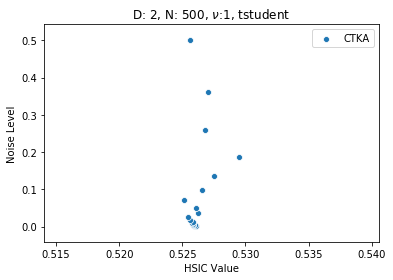

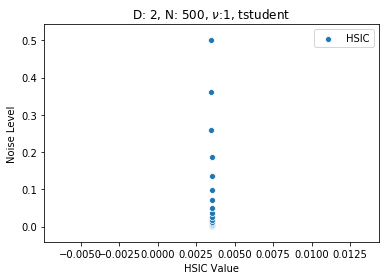

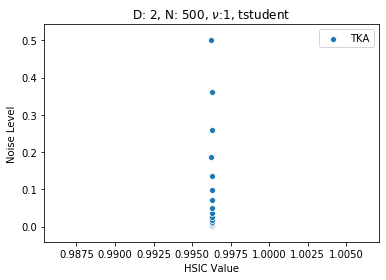

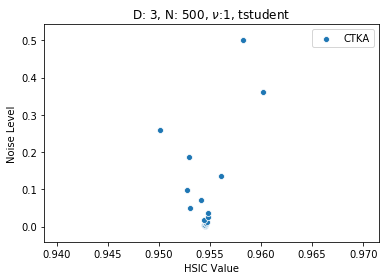

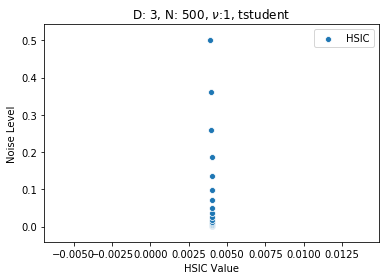

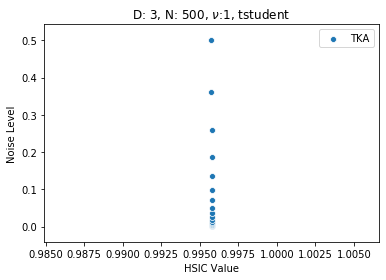

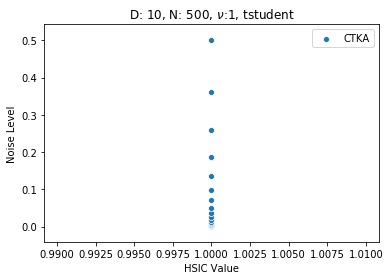

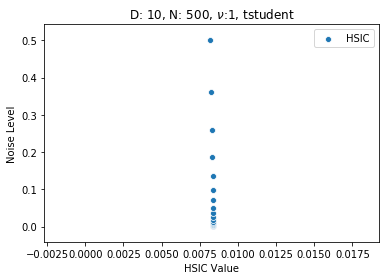

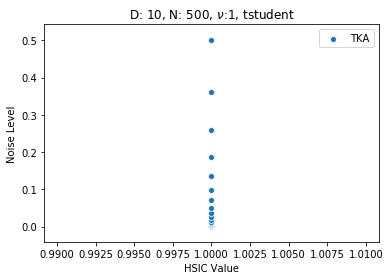

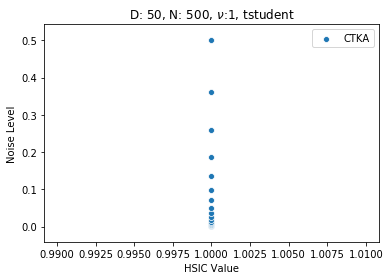

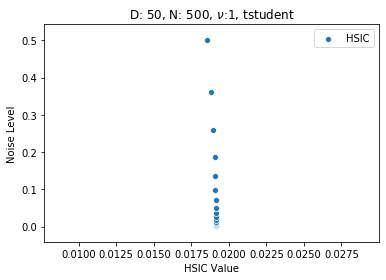

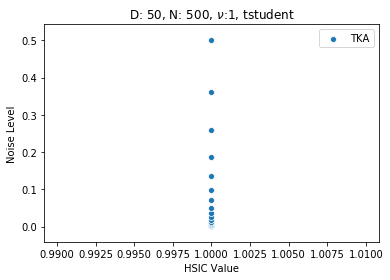

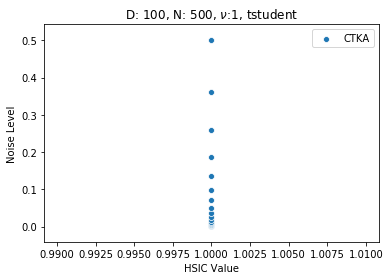

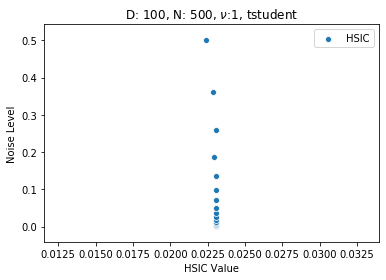

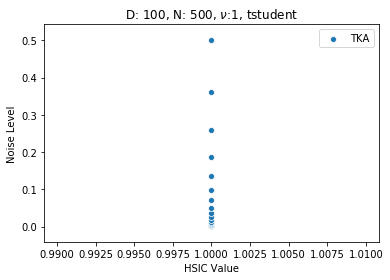

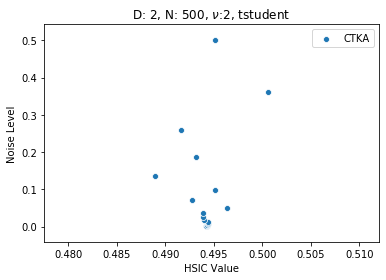

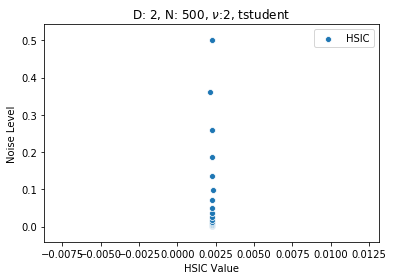

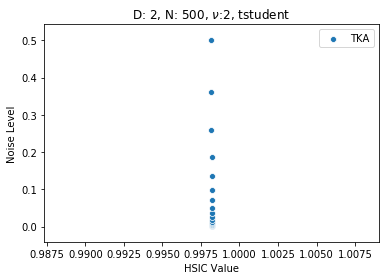

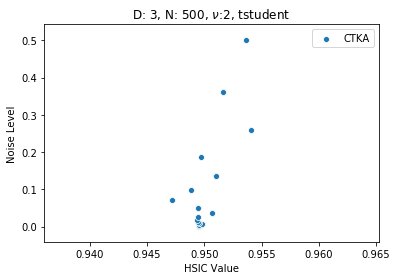

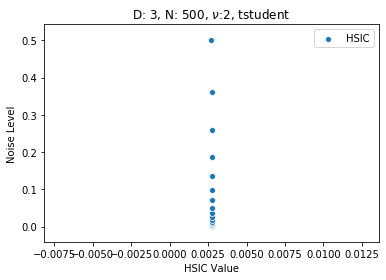

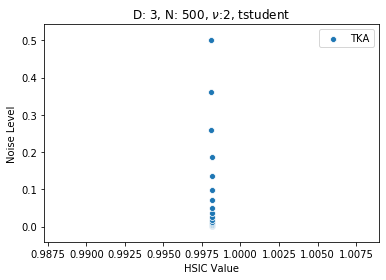

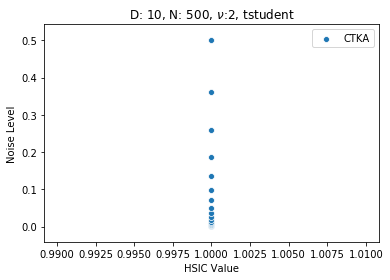

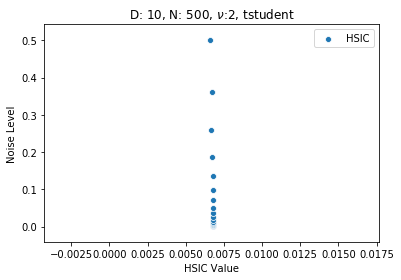

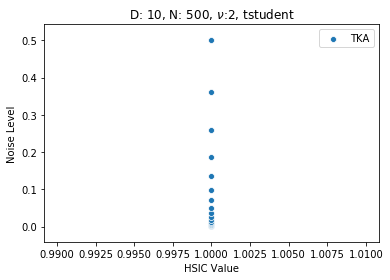

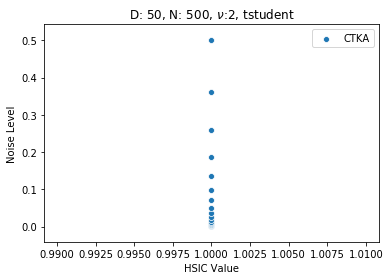

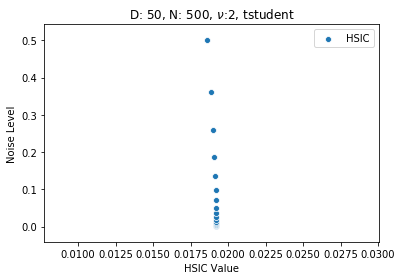

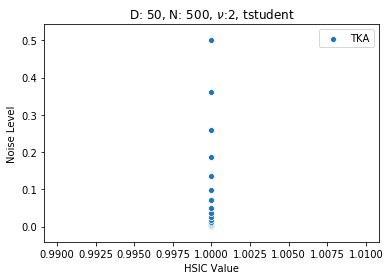

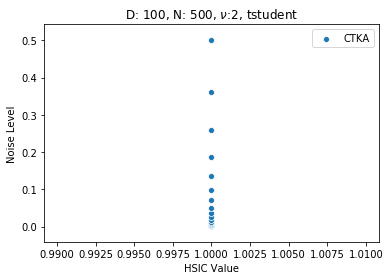

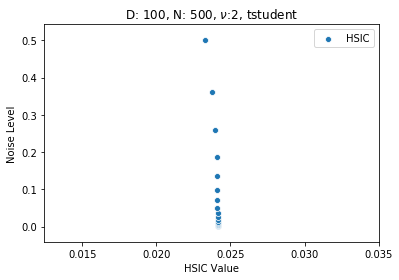

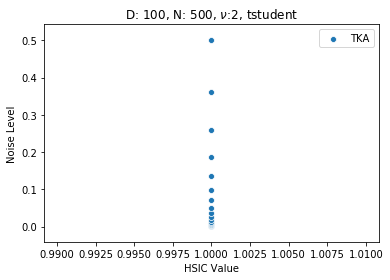

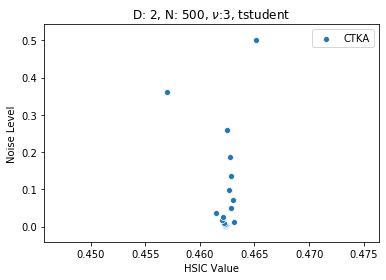

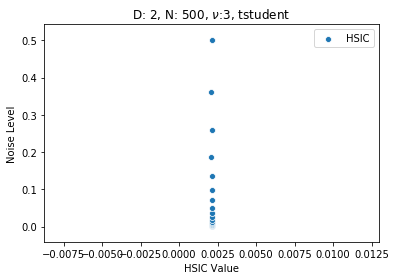

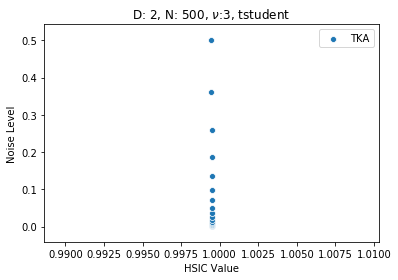

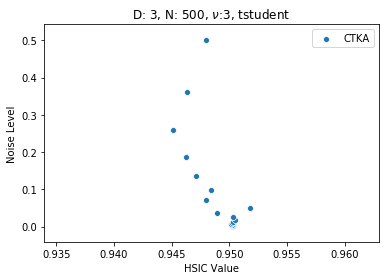

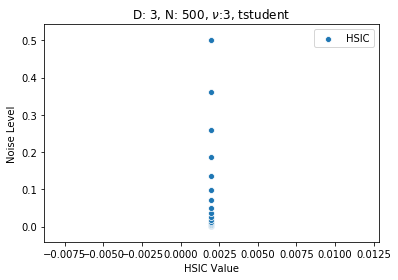

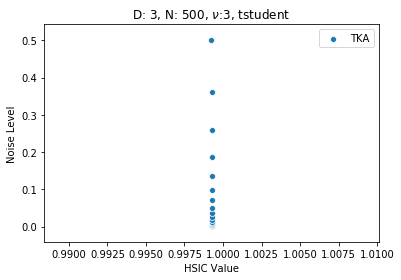

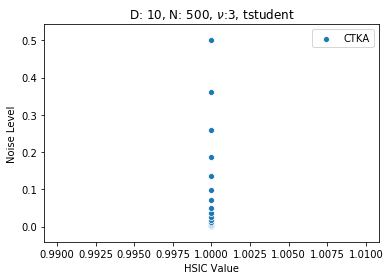

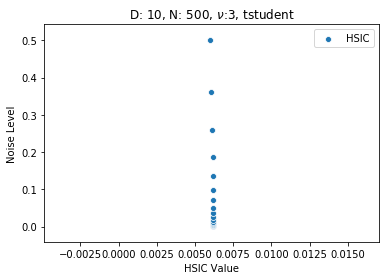

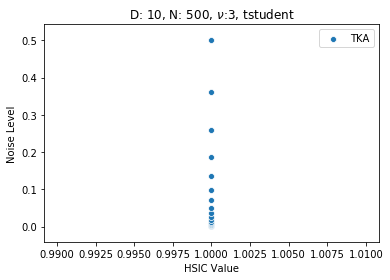

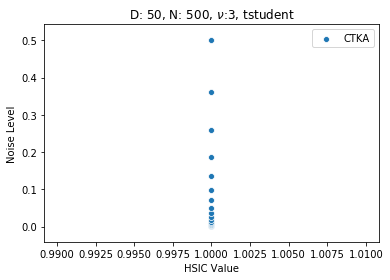

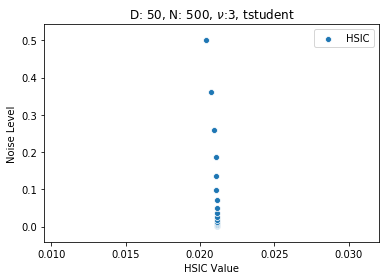

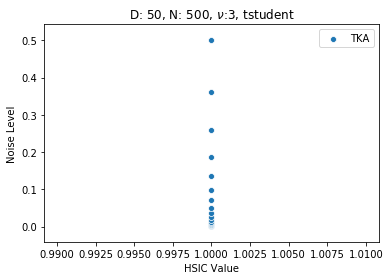

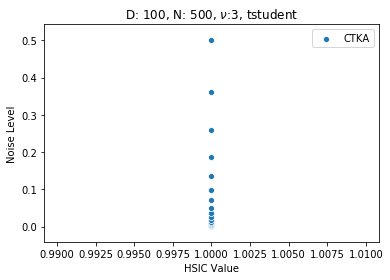

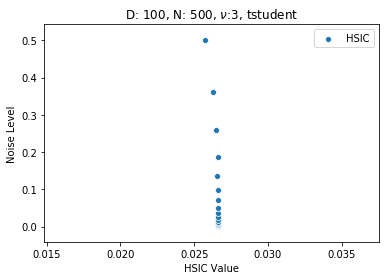

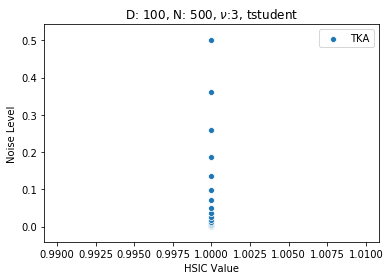

In [405]:
for igroup in subres:

    igroup, fixed_vars = plot_prepare(igroup[1])
    plot_tstudent(igroup, fixed_vars)
